In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O6','C6']
psi_dihedral=['C1','O6','C6','C5']

di_sugar=['GLC', 'GLC']
patterns1= ['GLC(*_*_)]-GLC(*_*_)', 'GLC(*_*_)-GLC(*_*_)','GLC(*_*_)]-[*]-GLC(*_*_)', 'GLC(*_*_)-[*]-GLC(*_*_)']
patterns2= ['DGlcpa1-6DGlcpa', 'DGlcpa1-6]DGlcpa', 'DGlcpa1-6[*]DGlcpa']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-6D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A7C', '1ABR', '1ABR', '1AGM', '1AH1', '1AU1', '1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1B0F', '1B0F', '1B37', '1B41', '1B5F', '1B5Q', '1BHG', '1BHG', '1BLF', '1BRR', '1BRR', '1BZB', '1C1Z', '1CDR', '1CF5', '1CF5', '1CKL', '1CKL', '1CKL', '1CKL', '1CPO', '1CVI', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CVU', '1CVU', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWF', '1DWG', '1DWH', '1DWI', '1DWJ', '1DZE', '1E04', '1E05', '1E4K', '1E4K', '1E6Q', '1E6S', '1EOM', '1ETH', '1ETH', '1EX1', '1F6A', '1F6A', '1F6A', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1F8R', '1F8R', '1F8R', '1FC1', '1FC1', '1FC2', '1FE2', '1FE8', '1FE8', '1FE8', '1FI1', '1FRT', '1FRT', '1FUJ', '1FUJ', '1FUJ', '1FUJ', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G6I', '1G6I

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 3 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 3 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 290 
valid torsion1 and torsion2: (290, 290)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['7.B', '6.B'], ['4C1', '4C1'])
(['6.B', '5.B'], ['4C1', '4C1'])
(['5.B', '4.B'], ['4C1', '4C1'])
(['4.B', '3.B'], ['4C1', '4C1'])
(['3.B', '2.B'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['3.B', '2.B'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['4.C', '3.C'], ['4C1', '-'])
(['3.C', '2.C'], ['-', '4C1'])
(['4.D', '3.D'], ['4C1', '-'])
(['3.D', '2.D'], ['-', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['3.G', '2.G'], ['4C1', '4C1'])
(['2.G', '1.G'], ['4C1', '4C1'])
(['2.J', '1.J'], ['4C1', '4C1'])
(['2.I', '1.I'], ['4C1', '4C1'])
(['5.B', '4.B'], ['4C1', '4C1'])
(['4.B', '3.B'], ['4C1', '4C1'])
(['3.B', '2.B'], ['4C1', '4C1'])
(['4.G', '3.G'], ['4C1', '4C1'])
(['3.G', '2.G'], ['4C1', '4C1'])
(['2.G', '1.G'], ['4C1', '4C1'])
(['3.D', '2.D'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['5.C', '4.C'], ['4C1', '4C1'])
(['4.C', '3.C'], ['4C1', '4C1'])
(['3.C', '2.C'], [

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//4j3x.pdb B GLC 7 C1
../../pdbs//4j3x.pdb B GLC 6 O6
6927 6926
Connection found between 6927 and 6926
../../pdbs//4j3x.pdb B GLC 6 C1
../../pdbs//4j3x.pdb B GLC 5 O6
6916 6915
No connection found between 6916 and 6915
1
../../pdbs//4j3x.pdb B GLC 5 C1
../../pdbs//4j3x.pdb B GLC 4 O6
6905 6904
No connection found between 6905 and 6904
2
../../pdbs//4j3x.pdb B GLC 4 C1
../../pdbs//4j3x.pdb B GLC 3 O6
6894 6893
Connection found between 6894 and 6893
../../pdbs//4j3x.pdb B GLC 3 C1
../../pdbs//4j3x.pdb B GLC 2 O6
6883 6882
No connection found between 6883 and 6882
4
../../pdbs//4j3x.pdb B GLC 2 C1
../../pdbs//4j3x.pdb B GLC 1 O6
6872 6871
No connection found between 6872 and 6871
5
../../pdbs//7bvt.pdb B GLC 3 C1
../../pdbs//7bvt.pdb B GLC 2 O6
2980 2979
Connection found between 2980 and 2979
../../pdbs//7bvt.pdb B GLC 2 C1
../../pdbs//7bvt.pdb B GLC 1 O6
2969 2968
No connection found between 2969 and 2968
7
../../pdbs//3wnp.pdb C GLC 4 C1
../../pdbs//3wnp.pdb C GLC 3 O6
11031 1

In [13]:
output_df.to_csv('DGlcpa1-6DGlcpa_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DGlcpa1-6DGlcpa_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,4j3x.pdb,B GLC 7 C2 C1 GLC 6 O6 C6,B GLC 7 C1 GLC 6 O6 C6 C5,199.2840,195.6380,"([GLC(7_B_), GLC(6_B_)], [59.18, 26.38])",GLC(7_B_)-GLC(6_B_)-GLC(5_B_)-GLC(4_B_)-GLC(3_...,DGlcpa1-6DGlcpa1-4DGlcpa1-4DGlcpa1-6DGlcpa1-4D...,"([7.B, 6.B], [4C1, 4C1])"
1,4j3x.pdb,B GLC 6 C2 C1 GLC 5 O6 C6,B GLC 6 C1 GLC 5 O6 C6 C5,316.2717,293.0384,"([GLC(6_B_), GLC(5_B_)], [26.38, 12.21])",GLC(7_B_)-GLC(6_B_)-GLC(5_B_)-GLC(4_B_)-GLC(3_...,DGlcpa1-6DGlcpa1-4DGlcpa1-4DGlcpa1-6DGlcpa1-4D...,"([6.B, 5.B], [4C1, 4C1])"
2,4j3x.pdb,B GLC 5 C2 C1 GLC 4 O6 C6,B GLC 5 C1 GLC 4 O6 C6 C5,298.2487,299.2829,"([GLC(5_B_), GLC(4_B_)], [12.21, 18.91])",GLC(7_B_)-GLC(6_B_)-GLC(5_B_)-GLC(4_B_)-GLC(3_...,DGlcpa1-6DGlcpa1-4DGlcpa1-4DGlcpa1-6DGlcpa1-4D...,"([5.B, 4.B], [4C1, 4C1])"
3,4j3x.pdb,B GLC 4 C2 C1 GLC 3 O6 C6,B GLC 4 C1 GLC 3 O6 C6 C5,164.4650,169.3700,"([GLC(4_B_), GLC(3_B_)], [18.91, 15.05])",GLC(7_B_)-GLC(6_B_)-GLC(5_B_)-GLC(4_B_)-GLC(3_...,DGlcpa1-6DGlcpa1-4DGlcpa1-4DGlcpa1-6DGlcpa1-4D...,"([4.B, 3.B], [4C1, 4C1])"
4,4j3x.pdb,B GLC 3 C2 C1 GLC 2 O6 C6,B GLC 3 C1 GLC 2 O6 C6 C5,175.3990,73.3320,"([GLC(3_B_), GLC(2_B_)], [15.05, 15.17])",GLC(7_B_)-GLC(6_B_)-GLC(5_B_)-GLC(4_B_)-GLC(3_...,DGlcpa1-6DGlcpa1-4DGlcpa1-4DGlcpa1-6DGlcpa1-4D...,"([3.B, 2.B], [4C1, 4C1])"
...,...,...,...,...,...,...,...,...,...
285,5f7u.pdb,B GLC 2 C2 C1 GLC 1 O6 C6,B GLC 2 C1 GLC 1 O6 C6 C5,160.9260,312.8209,"([GLC(2_B_), GLC(1_B_)], [24.0, 38.65])",GLC(4_B_)-[GLC(3_B_)-GLC(2_B_)]-GLC(1_B_),DGlcpa1-6DGlcpa1-3[DGlcpa1-6]DGlcpa1-ROH,"([2.B, 1.B], [4C1, -])"
286,5f7u.pdb,B GLC 3 C2 C1 GLC 2 O6 C6,B GLC 3 C1 GLC 2 O6 C6 C5,190.0120,172.2890,"([GLC(3_B_), GLC(2_B_)], [18.0, 24.0])",GLC(4_B_)-[GLC(3_B_)-GLC(2_B_)]-GLC(1_B_),DGlcpa1-6DGlcpa1-3[DGlcpa1-6]DGlcpa1-ROH,"([3.B, 2.B], [4C1, 4C1])"
287,5f7u.pdb,B GLC 4 C2 C1 GLC 1 O6 C6,B GLC 4 C1 GLC 1 O6 C6 C5,126.3320,209.5200,"([GLC(4_B_), GLC(1_B_)], [45.95, 38.65])",GLC(4_B_)-[GLC(3_B_)-GLC(2_B_)]-GLC(1_B_),DGlcpa1-6DGlcpa1-3[DGlcpa1-6]DGlcpa1-ROH,"([4.B, 1.B], [BO3, -])"
288,5f7u.pdb,C GLC 2 C2 C1 GLC 1 O6 C6,C GLC 2 C1 GLC 1 O6 C6 C5,181.0280,227.9820,"([GLC(2_C_), GLC(1_C_)], [30.13, 50.31])",GLC(2_C_)-GLC(1_C_),DGlcpa1-6DGlcpa1-ROH,"([2.C, 1.C], [4C1, -])"


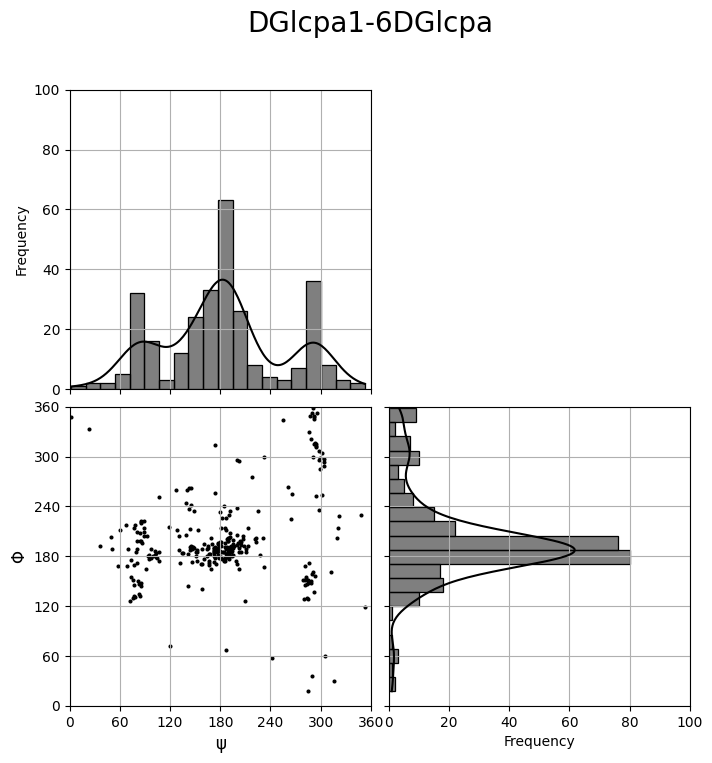

In [16]:
instant1.plot(torsions=instant1.torsions, title='DGlcpa1-6DGlcpa',max_histogram_scale=100,step_histogram_tick=20)